In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/raj/Data science/hackathon 2/SData.csv',sep=',')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,450911004203547,2017-02-20 05:59:49,2017-02-19 19:57:17,456
0,1873416,15262467,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106
1,13687576,25626803,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300
2,4405059,39995566,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0
3,8118119,17767318,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2
4,11349847,53818554,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515


In [4]:
df = df.rename(columns={'450911004203547': 'Device ID', '2017-02-20 05:59:49': 'ServerTime','2017-02-19 19:57:17':'LocalTime','456':'Balance'})

In [5]:
df=df.drop('Unnamed: 0',1)

In [6]:
df=df.drop('Unnamed: 0.1',1)

In [7]:
df.head()

,Device ID,ServerTime,LocalTime,Balance
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515


In [8]:
df['SDate'] = pd.to_datetime(df['ServerTime']).dt.date
df['STime'] = pd.to_datetime(df['ServerTime']).dt.time

In [9]:
df['LDate'] = pd.to_datetime(df['LocalTime']).dt.date
df['LTime'] = pd.to_datetime(df['LocalTime']).dt.time

In [10]:
df['SrvMonth'] = pd.DatetimeIndex(df['ServerTime']).month
df['LocMonth'] = pd.DatetimeIndex(df['LocalTime']).month

In [11]:
df['ServerTime'].min(), df['ServerTime'].max()

('2017-02-20 08:03:30', '2017-07-18 05:22:27')

In [12]:
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7


In [13]:
df.dropna()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7
5,6.519112e+14,2017-04-14 20:10:34,2017-04-14 07:45:23,4,2017-04-14,20:10:34,2017-04-14,07:45:23,4,4
6,9.009110e+14,2017-06-14 21:42:38,2017-06-13 15:10:41,82,2017-06-14,21:42:38,2017-06-13,15:10:41,6,6
7,6.589116e+14,2017-03-25 20:28:29,2017-03-25 20:06:19,910,2017-03-25,20:28:29,2017-03-25,20:06:19,3,3
8,6.599113e+14,2017-07-06 22:08:53,2017-07-06 07:06:15,2864,2017-07-06,22:08:53,2017-07-06,07:06:15,7,7
9,6.099110e+14,2017-05-28 11:58:52,2017-05-25 17:11:36,1398,2017-05-28,11:58:52,2017-05-25,17:11:36,5,5


In [14]:
df['Device ID'].groupby(df['Balance']).describe()

,count,mean,std,min,25%,50%,75%,max
Balance,,,,,,,,
-529,1.0,3.529114e+14,NaN,3.529114e+14,3.529114e+14,3.529114e+14,3.529114e+14,3.529114e+14
-229,1.0,6.589111e+14,NaN,6.589111e+14,6.589111e+14,6.589111e+14,6.589111e+14,6.589111e+14
0,12363.0,5.495122e+14,2.199019e+14,9.110002e+11,5.509120e+14,6.099116e+14,6.589115e+14,9.529113e+14
1,5958.0,5.701546e+14,2.061654e+14,9.110056e+11,6.009114e+14,6.509114e+14,6.589116e+14,9.009118e+14
2,2531.0,5.790411e+14,1.956888e+14,9.110035e+11,6.069112e+14,6.509119e+14,6.589117e+14,9.009117e+14
3,948.0,5.831893e+14,1.904599e+14,9.110078e+11,6.069115e+14,6.519112e+14,6.589116e+14,9.009117e+14
4,587.0,5.817989e+14,1.936750e+14,9.110064e+11,6.064112e+14,6.509120e+14,6.599110e+14,9.009113e+14
5,254.0,5.715177e+14,1.957731e+14,9.111035e+11,5.519115e+14,6.509111e+14,6.589115e+14,9.009112e+14
6,209.0,5.455765e+14,2.368712e+14,9.110113e+11,6.009110e+14,6.509115e+14,6.599110e+14,9.009116e+14


In [15]:
df['Balance'].groupby(df['SrvMonth']).describe()

,count,mean,std,min,25%,50%,75%,max
SrvMonth,,,,,,,,
2,149.0,2618.852349,4326.337894,0.0,50.0,854.0,3622.00,25541.0
3,2489.0,3236.541181,10943.118549,0.0,15.0,811.0,3350.00,377848.0
4,13207.0,2440.172863,7462.979296,0.0,3.0,501.0,2542.50,405081.0
5,20553.0,2399.828054,9621.791729,0.0,2.0,478.0,2400.00,635146.0
6,21255.0,1988.014303,7476.954622,0.0,1.0,253.0,2066.00,530300.0
7,17082.0,1811.914062,9086.766499,-529.0,1.0,114.0,1722.75,801237.0


In [16]:
df['Shour'] = pd.to_datetime( df['STime'] ,format='%Y-%m-%d %H:%M:%S',errors='ignore')


In [17]:
df['weekday'] = pd.to_datetime( df['SDate'] ,format='%Y-%m-%d %H:%M:%S',errors='ignore')


In [18]:
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6,09:16:44,2017-06-23
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5,07:09:52,2017-05-14
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7,10:37:16,2017-07-17


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74735 entries, 0 to 74734
Data columns (total 12 columns):
Device ID     74735 non-null float64
ServerTime    74735 non-null object
LocalTime     74735 non-null object
Balance       74735 non-null int64
SDate         74735 non-null object
STime         74735 non-null object
LDate         74735 non-null object
LTime         74735 non-null object
SrvMonth      74735 non-null int64
LocMonth      74735 non-null int64
Shour         74735 non-null object
weekday       74735 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 6.8+ MB


In [20]:
df2=df


In [21]:
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6,09:16:44,2017-06-23
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5,07:09:52,2017-05-14
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7,10:37:16,2017-07-17


In [22]:
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6,09:16:44,2017-06-23
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5,07:09:52,2017-05-14
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7,10:37:16,2017-07-17


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74735 entries, 0 to 74734
Data columns (total 12 columns):
Device ID     74735 non-null float64
ServerTime    74735 non-null object
LocalTime     74735 non-null object
Balance       74735 non-null int64
SDate         74735 non-null object
STime         74735 non-null object
LDate         74735 non-null object
LTime         74735 non-null object
SrvMonth      74735 non-null int64
LocMonth      74735 non-null int64
Shour         74735 non-null object
weekday       74735 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 6.8+ MB


In [24]:
df2['LDate'] = pd.to_datetime(df['LDate']).dt.normalize()
df2['SDate'] = pd.to_datetime(df['SDate']).dt.normalize()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74735 entries, 0 to 74734
Data columns (total 12 columns):
Device ID     74735 non-null float64
ServerTime    74735 non-null object
LocalTime     74735 non-null object
Balance       74735 non-null int64
SDate         74735 non-null datetime64[ns]
STime         74735 non-null object
LDate         74735 non-null datetime64[ns]
LTime         74735 non-null object
SrvMonth      74735 non-null int64
LocMonth      74735 non-null int64
Shour         74735 non-null object
weekday       74735 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 6.8+ MB


In [26]:
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6,09:16:44,2017-06-23
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5,07:09:52,2017-05-14
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7,10:37:16,2017-07-17


In [27]:
df.drop(['LocalTime', 'LTime'], axis=1)

,Device ID,ServerTime,Balance,SDate,STime,LDate,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2106,2017-05-03,16:09:22,2017-05-03,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,300,2017-05-27,07:06:39,2017-05-27,5,5,07:06:39,2017-05-27
2,8.029119e+14,2017-06-23 09:16:44,0,2017-06-23,09:16:44,2017-06-22,6,6,09:16:44,2017-06-23
3,6.509116e+14,2017-05-14 07:09:52,2,2017-05-14,07:09:52,2017-05-13,5,5,07:09:52,2017-05-14
4,3.559111e+14,2017-07-17 10:37:16,515,2017-07-17,10:37:16,2017-07-16,7,7,10:37:16,2017-07-17
5,6.519112e+14,2017-04-14 20:10:34,4,2017-04-14,20:10:34,2017-04-14,4,4,20:10:34,2017-04-14
6,9.009110e+14,2017-06-14 21:42:38,82,2017-06-14,21:42:38,2017-06-13,6,6,21:42:38,2017-06-14
7,6.589116e+14,2017-03-25 20:28:29,910,2017-03-25,20:28:29,2017-03-25,3,3,20:28:29,2017-03-25
8,6.599113e+14,2017-07-06 22:08:53,2864,2017-07-06,22:08:53,2017-07-06,7,7,22:08:53,2017-07-06
9,6.099110e+14,2017-05-28 11:58:52,1398,2017-05-28,11:58:52,2017-05-25,5,5,11:58:52,2017-05-28


In [28]:
df.head(2)

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74735 entries, 0 to 74734
Data columns (total 12 columns):
Device ID     74735 non-null float64
ServerTime    74735 non-null object
LocalTime     74735 non-null object
Balance       74735 non-null int64
SDate         74735 non-null datetime64[ns]
STime         74735 non-null object
LDate         74735 non-null datetime64[ns]
LTime         74735 non-null object
SrvMonth      74735 non-null int64
LocMonth      74735 non-null int64
Shour         74735 non-null object
weekday       74735 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(5)
memory usage: 6.8+ MB


In [30]:
df["year"] = df["weekday"].dt.year
df["month"] = df["weekday"].dt.strftime('%b')
df.head()

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday,year,month
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03,2017,May
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27,2017,May
2,8.029119e+14,2017-06-23 09:16:44,2017-06-22 23:14:41,0,2017-06-23,09:16:44,2017-06-22,23:14:41,6,6,09:16:44,2017-06-23,2017,Jun
3,6.509116e+14,2017-05-14 07:09:52,2017-05-13 23:32:01,2,2017-05-14,07:09:52,2017-05-13,23:32:01,5,5,07:09:52,2017-05-14,2017,May
4,3.559111e+14,2017-07-17 10:37:16,2017-07-16 19:43:19,515,2017-07-17,10:37:16,2017-07-16,19:43:19,7,7,10:37:16,2017-07-17,2017,Jul


/home/raj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


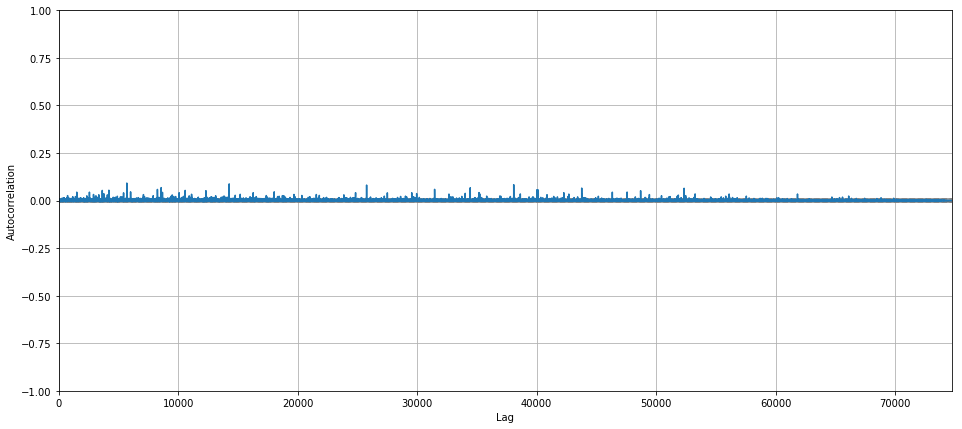

In [31]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(df["Balance"])

In [32]:
dfLargest = df.nlargest(5000, ['Balance'])

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = dfLargest[["SDate", "Balance"]]
decompose.index = dfLargest["SDate"]
decompose = decompose[["Balance"]]
decompose.head()

,Balance
SDate,
2017-07-06,801237
2017-05-31,635146
2017-05-27,611365
2017-07-16,594993
2017-06-27,530300


In [34]:
decomposition = seasonal_decompose(decompose,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

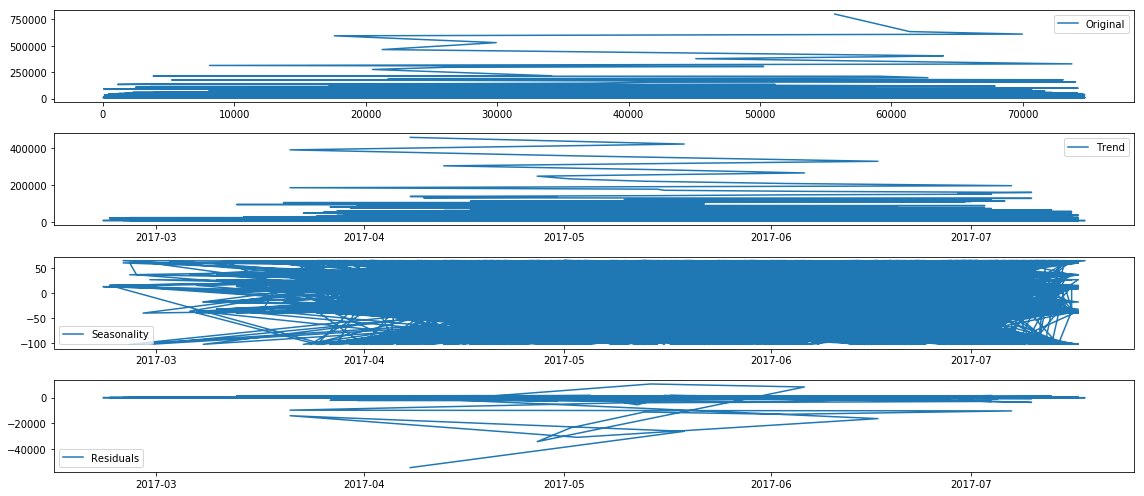

In [35]:
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(dfLargest["Balance"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

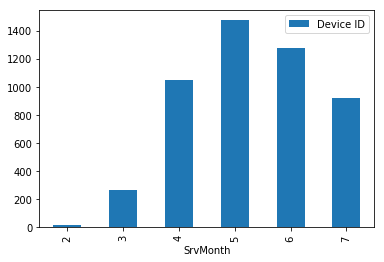

In [36]:
dfLargest.groupby('SrvMonth').agg({"Device ID":np.count_nonzero}).plot(kind = 'bar')

In [37]:
df['week_number_of_year'] = df['weekday'].dt.week


In [38]:
df.head(2)

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday,year,month,week_number_of_year
0,6.509119e+14,2017-05-03 16:09:22,2017-05-03 14:34:41,2106,2017-05-03,16:09:22,2017-05-03,14:34:41,5,5,16:09:22,2017-05-03,2017,May,18
1,6.599114e+14,2017-05-27 07:06:39,2017-05-27 06:42:09,300,2017-05-27,07:06:39,2017-05-27,06:42:09,5,5,07:06:39,2017-05-27,2017,May,21


In [39]:
df=df.nlargest(5000, ['Balance'])

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = df[["SDate", "Balance"]]
decompose.index = df["SDate"]
decompose = decompose[["Balance"]]
decompose.head()

,Balance
SDate,
2017-07-06,801237
2017-05-31,635146
2017-05-27,611365
2017-07-16,594993
2017-06-27,530300


In [41]:
decomposition = seasonal_decompose(decompose,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

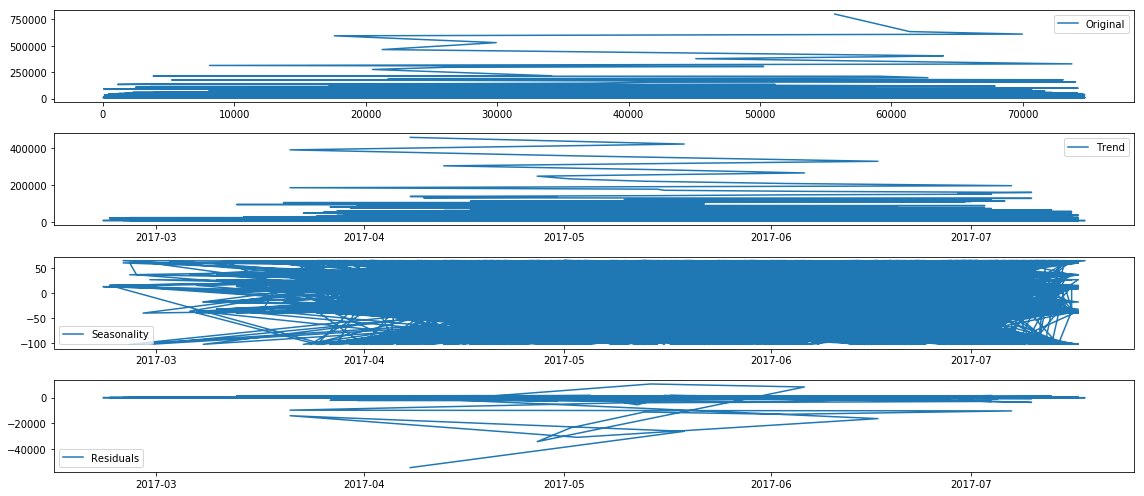

In [42]:
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(df["Balance"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

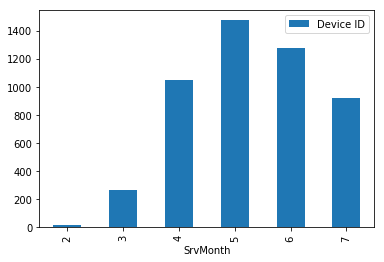

In [43]:
df.groupby('SrvMonth').agg({"Device ID":np.count_nonzero}).plot(kind = 'bar')

In [44]:
df.head(2)

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday,year,month,week_number_of_year
55698,9.115818e+11,2017-07-06 08:45:43,2017-07-04 17:13:20,801237,2017-07-06,08:45:43,2017-07-04,17:13:20,7,7,08:45:43,2017-07-06,2017,Jul,27
61390,8.019113e+14,2017-05-31 14:04:55,2017-05-31 07:56:53,635146,2017-05-31,14:04:55,2017-05-31,07:56:53,5,5,14:04:55,2017-05-31,2017,May,22


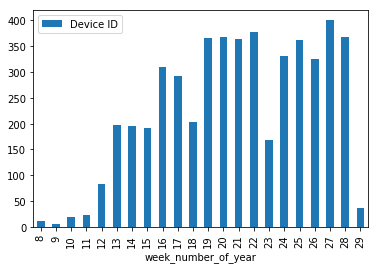

In [45]:
df.groupby('week_number_of_year').agg({"Device ID":np.count_nonzero}).plot(kind = 'bar')

In [46]:
df['day'] = df["weekday"].dt.strftime('%A')

In [47]:
df.head(2)

,Device ID,ServerTime,LocalTime,Balance,SDate,STime,LDate,LTime,SrvMonth,LocMonth,Shour,weekday,year,month,week_number_of_year,day
55698,9.115818e+11,2017-07-06 08:45:43,2017-07-04 17:13:20,801237,2017-07-06,08:45:43,2017-07-04,17:13:20,7,7,08:45:43,2017-07-06,2017,Jul,27,Thursday
61390,8.019113e+14,2017-05-31 14:04:55,2017-05-31 07:56:53,635146,2017-05-31,14:04:55,2017-05-31,07:56:53,5,5,14:04:55,2017-05-31,2017,May,22,Wednesday


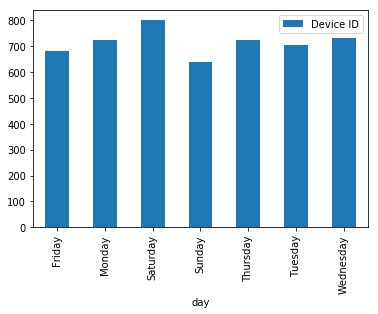

In [48]:
df.groupby('day').agg({"Device ID":np.count_nonzero}).plot(kind = 'bar')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 55698 to 20661
Data columns (total 16 columns):
Device ID              5000 non-null float64
ServerTime             5000 non-null object
LocalTime              5000 non-null object
Balance                5000 non-null int64
SDate                  5000 non-null datetime64[ns]
STime                  5000 non-null object
LDate                  5000 non-null datetime64[ns]
LTime                  5000 non-null object
SrvMonth               5000 non-null int64
LocMonth               5000 non-null int64
Shour                  5000 non-null object
weekday                5000 non-null datetime64[ns]
year                   5000 non-null int64
month                  5000 non-null object
week_number_of_year    5000 non-null int64
day                    5000 non-null object
dtypes: datetime64[ns](3), float64(1), int64(5), object(7)
memory usage: 664.1+ KB


In [50]:
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

#df = pd.read_csv("/home/raj/Data science/hackathon 2/SData.csv")
df["ServerTime"] = pd.to_datetime(df["ServerTime"])
df.index = df["ServerTime"]
df = df[["Balance"]]
print(df.shape)
print(df.head())
x_train = df[df.index >datetime.datetime(2017,2,20, 0, 0, 0)]
x_test = df[df.index <=datetime.datetime(2017,5,18, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(5000, 1)
                     Balance
ServerTime                  
2017-07-06 08:45:43   801237
2017-05-31 14:04:55   635146
2017-05-27 10:15:16   611365
2017-07-16 10:28:59   594993
2017-06-27 17:56:20   530300
(5000, 1) (2055, 1)


Test Statistic                  -51.081523
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    4998.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


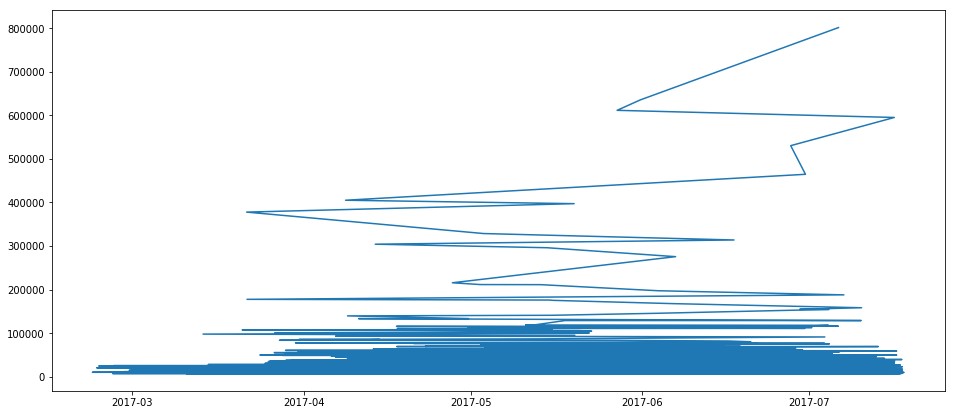

In [51]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(data.Balance, 1)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.Balance)
    plt.show()

stationarity_test(x_train)

In [52]:
len(x_train)

5000

Test Statistic                  -20.882028
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    4998.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


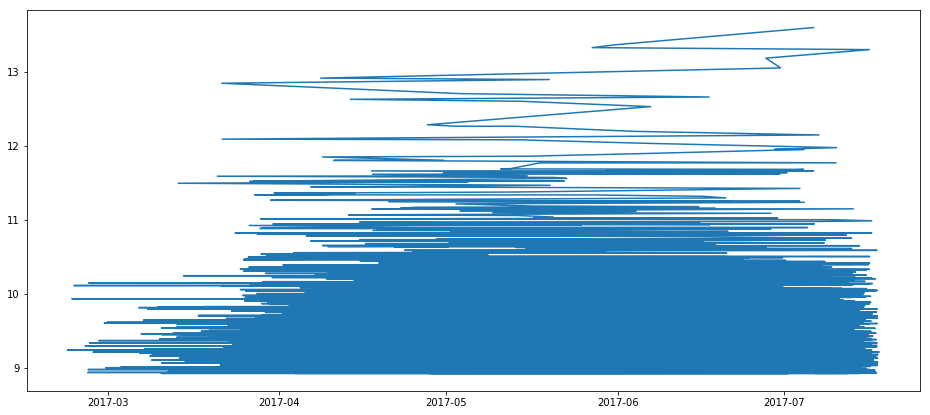

In [53]:
log_train = x_train
log_train = log_train["Balance"].apply(lambda x: math.log(x+1))  #x +1 is taken bcoz log 0 is 1
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

In [54]:
('2017-02-20 08:03:30', '2017-07-18 05:22:27')

('2017-02-20 08:03:30', '2017-07-18 05:22:27')

In [55]:
df.head(2)

,Balance
ServerTime,
2017-07-06 08:45:43,801237
2017-05-31 14:04:55,635146


In [56]:
df.columns

Index(['Balance'], dtype='object')

In [57]:
#df["Mar"] = df["SrvMonth"].apply(lambda x: 1 if x == 3 else 0)
#df["Feb"] = df["SrvMonth"].apply(lambda x: 1 if x == 2 else 0)
#df["April"] = df["SrvMonth"].apply(lambda x: 1 if x == 4 else 0)
#df["May"] = df["SrvMonth"].apply(lambda x: 1 if x == 5 else 0)
#df["June"] = df["SrvMonth"].apply(lambda x: 1 if x == 6 else 0)
#df["July"] = df["SrvMonth"].apply(lambda x: 1 if x == 7 else 0)
#df["August"] = df["SrvMonth"].apply(lambda x: 1 if x == 8 else 0)

In [58]:
df.head()

,Balance
ServerTime,
2017-07-06 08:45:43,801237
2017-05-31 14:04:55,635146
2017-05-27 10:15:16,611365
2017-07-16 10:28:59,594993
2017-06-27 17:56:20,530300


In [59]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import TimeSeriesSplit


#X=df['ServerTime']
#y=df['Balance']
#tscv = TimeSeriesSplit(n_splits=5)

In [60]:
#TimeSeriesSplit(max_train_size=None, n_splits=5)

Test Statistic                  -37.065320
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    4998.000000
Critical Value (1%)              -3.431659
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64


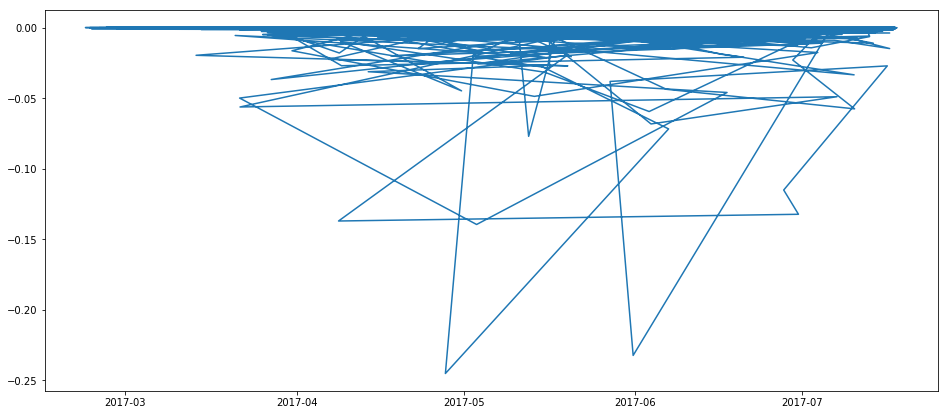

In [61]:
first_diff = log_train["Balance"] - log_train["Balance"].shift(1)
first_diff = first_diff.fillna(0)#differentiation  and for integration we use cumsum(cummulative sum) from pandas
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)


from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

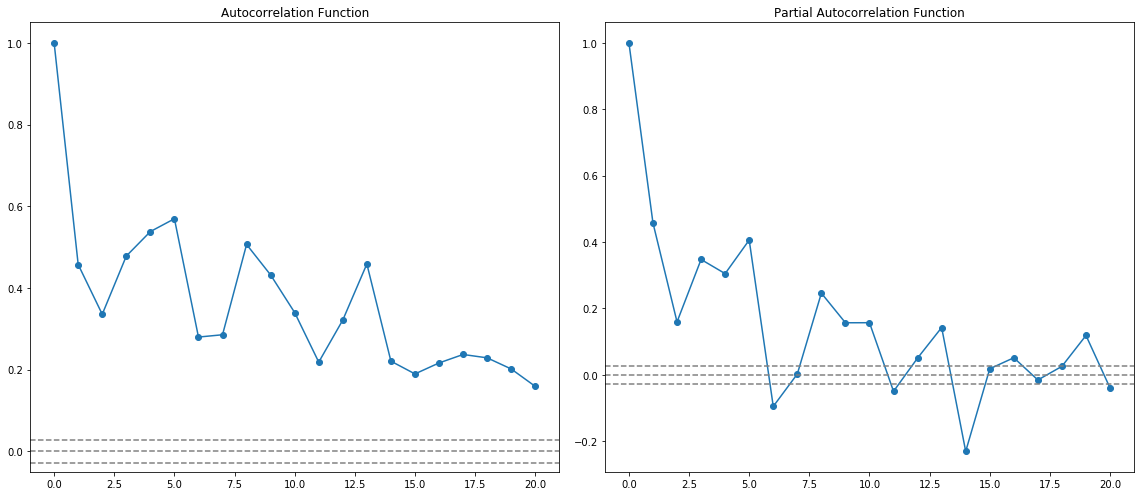

In [62]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')#confidence level dotted lines
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')#confidence level dotted lines
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [63]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  

/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


26838.729117100545


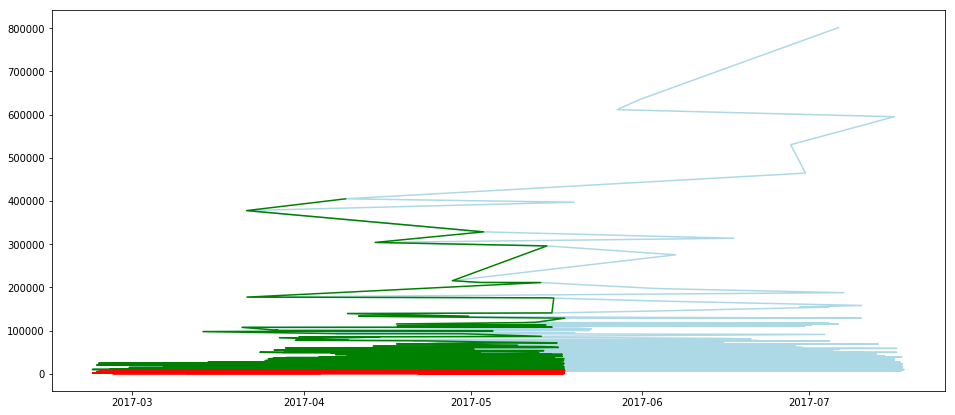

In [64]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


26804.256743859976


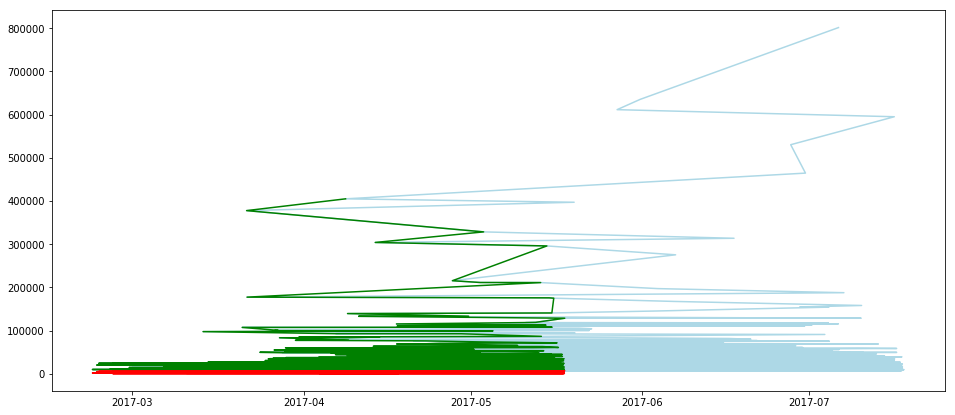

In [65]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.Balance   No. Observations:                 4999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               19336.955
Method:                       css-mle   S.D. of innovations              0.005
Date:                Sun, 03 Mar 2019   AIC                         -38665.909
Time:                        15:44:57   BIC                         -38639.841
Sample:                             1   HQIC                        -38656.773
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0341      0.038     -0.897      0.370      -0.109       0.040
ar.L1.D.Balance     0.9998      0.000   5199.854      0.000       0.999       1.000
ma.L1.D.Balance    -0.8496      

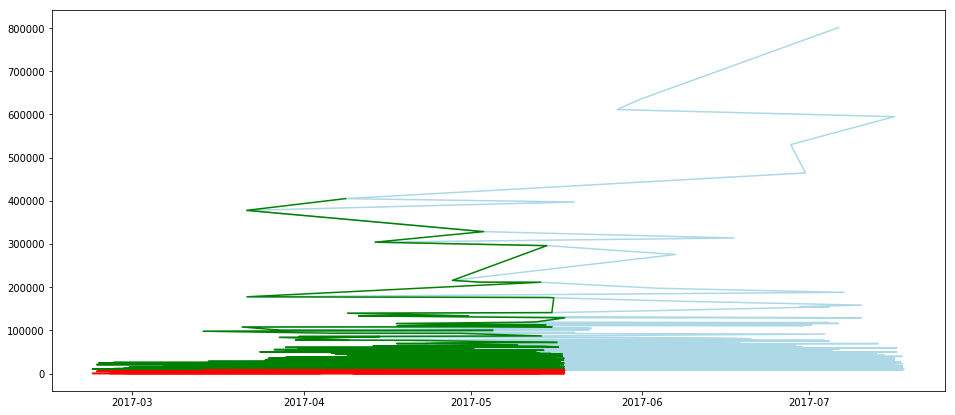

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [68]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train.Balance, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit(disp=-1)
print(results.summary())

/home/raj/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: non-invertible starting MA parameters found with `enforce_invertibility` set to True.

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [ ]:
pred = ts['y'].rolling(window=12).mean()
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = tss.index
pred.head()
measure = math.pow(mean_squared_error(x_test.values, pred[pred.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)].values), 0.5)
print("RMSE: ",measure)